In [1]:
from sklearn.cluster import KMeans
import numpy as np

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# 2a
real_value_array = np.loadtxt('predicate-matrix-continuous.txt')

In [4]:
real_value_array[0]

array([-1.  , -1.  , -1.  , -1.  , 12.34,  0.  ,  0.  ,  0.  , 16.11,
        9.19,  0.  , 38.09,  4.44, 28.55, 38.75,  5.68, 17.07, 39.99,
        0.  ,  0.  , 67.08,  7.78,  0.  , 60.24, 16.8 , 40.59, 29.7 ,
        5.56,  2.47,  0.  , 87.43,  0.  ,  8.64,  9.04,  0.  ,  9.23,
        1.23,  0.  , 54.58, 70.86,  3.33, 33.56,  8.15, 26.14,  0.  ,
       67.85, 41.19,  7.36,  1.11,  6.94, 62.32,  0.  ,  4.44,  0.  ,
       57.76, 12.63, 33.24, 61.86,  0.  ,  0.  ,  0.  ,  0.  , 22.72,
       55.81,  5.9 ,  0.  ,  0.  , 19.88, 54.79,  4.94, 40.97,  0.  ,
       22.32,  0.  , 57.14,  0.  ,  0.  ,  1.23, 10.49, 39.24, 17.57,
       50.59,  2.35,  9.7 ,  8.38])

In [5]:
animal_names = np.genfromtxt('classes.txt', dtype=None, encoding=None)

In [6]:
animal_names[0]

(1, 'antelope')

In [7]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(real_value_array)

In [8]:
cluster_labels = kmeans.predict(real_value_array)

In [9]:
clusters = {}
for i, label in enumerate(cluster_labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(real_value_array[i])

In [10]:
animals = [animal[1] for animal in animal_names]

In [11]:
for cluster_num in clusters:
    print('Cluster ' + str(cluster_num) + ':')
    for animal in clusters[cluster_num]:
        index = np.array([all(row) for row in np.isin(real_value_array, animal)]).nonzero()
        print(animal_names[index[0][0]][1])

Cluster 0:
antelope
horse
moose
giraffe
zebra
deer
Cluster 9:
grizzly+bear
polar+bear
Cluster 2:
killer+whale
blue+whale
humpback+whale
walrus
dolphin
Cluster 8:
beaver
seal
otter
Cluster 4:
dalmatian
persian+cat
german+shepherd
siamese+cat
chihuahua
collie
Cluster 3:
skunk
mole
hamster
squirrel
rabbit
rat
mouse
raccoon
Cluster 1:
tiger
leopard
fox
wolf
weasel
bobcat
lion
Cluster 5:
hippopotamus
elephant
ox
sheep
rhinoceros
buffalo
giant+panda
pig
cow
Cluster 6:
spider+monkey
gorilla
chimpanzee
Cluster 7:
bat


In [12]:
# 2b
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10

In [13]:
from matplotlib import pyplot as plt

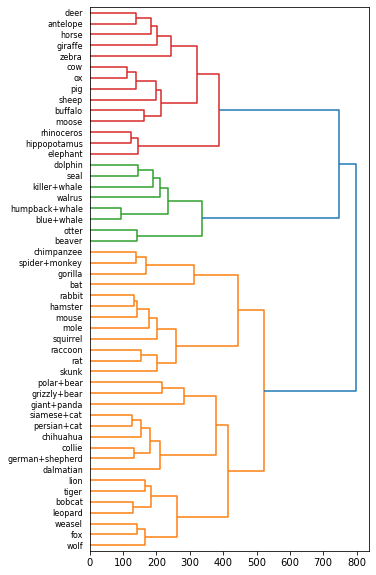

In [14]:
Z = linkage(real_value_array, 'ward')
fig = plt.figure()
dn = dendrogram(Z, orientation='right', labels=animals)